0    303.277344
1    303.144531
2    304.068359
3    304.246582
4    303.548096
dtype: float64 0    303.273438
1    297.955078
2    296.265869
3    294.992676
4    293.594055
dtype: float64


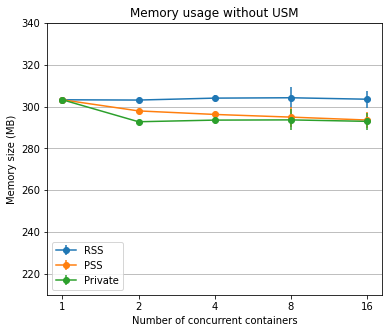

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math

# benchmark = sys.argv[1]
# num = sys.argv[2]
# dedup = sys.argv[3]

usm_data_dir = r"/work/serverless/2022/memdedup/usm_plot_data_needed"
# machine = r"einstein_vm"
machine = r"einstein_vm"
benchmark = "411.image-recognition"
num = 16
dedup = 0

data_dir = os.path.join(usm_data_dir, machine, "memory_usage", benchmark, "function_memory", "dedup_off")


n = math.log(int(num),2)
n = int(n)
# x_axis = np.logspace(0,n,n+1,base=2)
x_axis = [1, 2, 4, 8, 16]

data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)
# print(x)

# plt.subplot(1,2,1)
# plt.rcParams['figure.dpi'] = 500
plt.rcParams["figure.figsize"] = (6,5)
plt.errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
plt.errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
plt.errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
plt.title("Memory usage without USM")
plt.xlabel('Number of concurrent containers')
plt.ylabel('Memory size (MB)')
plt.ylim(ymin=210, ymax=340)
plt.xticks(x, x_axis)
plt.legend(loc="lower left")
plt.grid(axis='y')


#     plt.savefig(os.path.join(data_dir + "/", "concurrent_dedup.jpg"))





0    303.988281
1    309.085938
2    316.691406
3    312.296875
4    312.068359
dtype: float64 0    303.984375
1    263.207031
2    248.306396
3    231.529907
4    224.737000
dtype: float64
dedup: 1


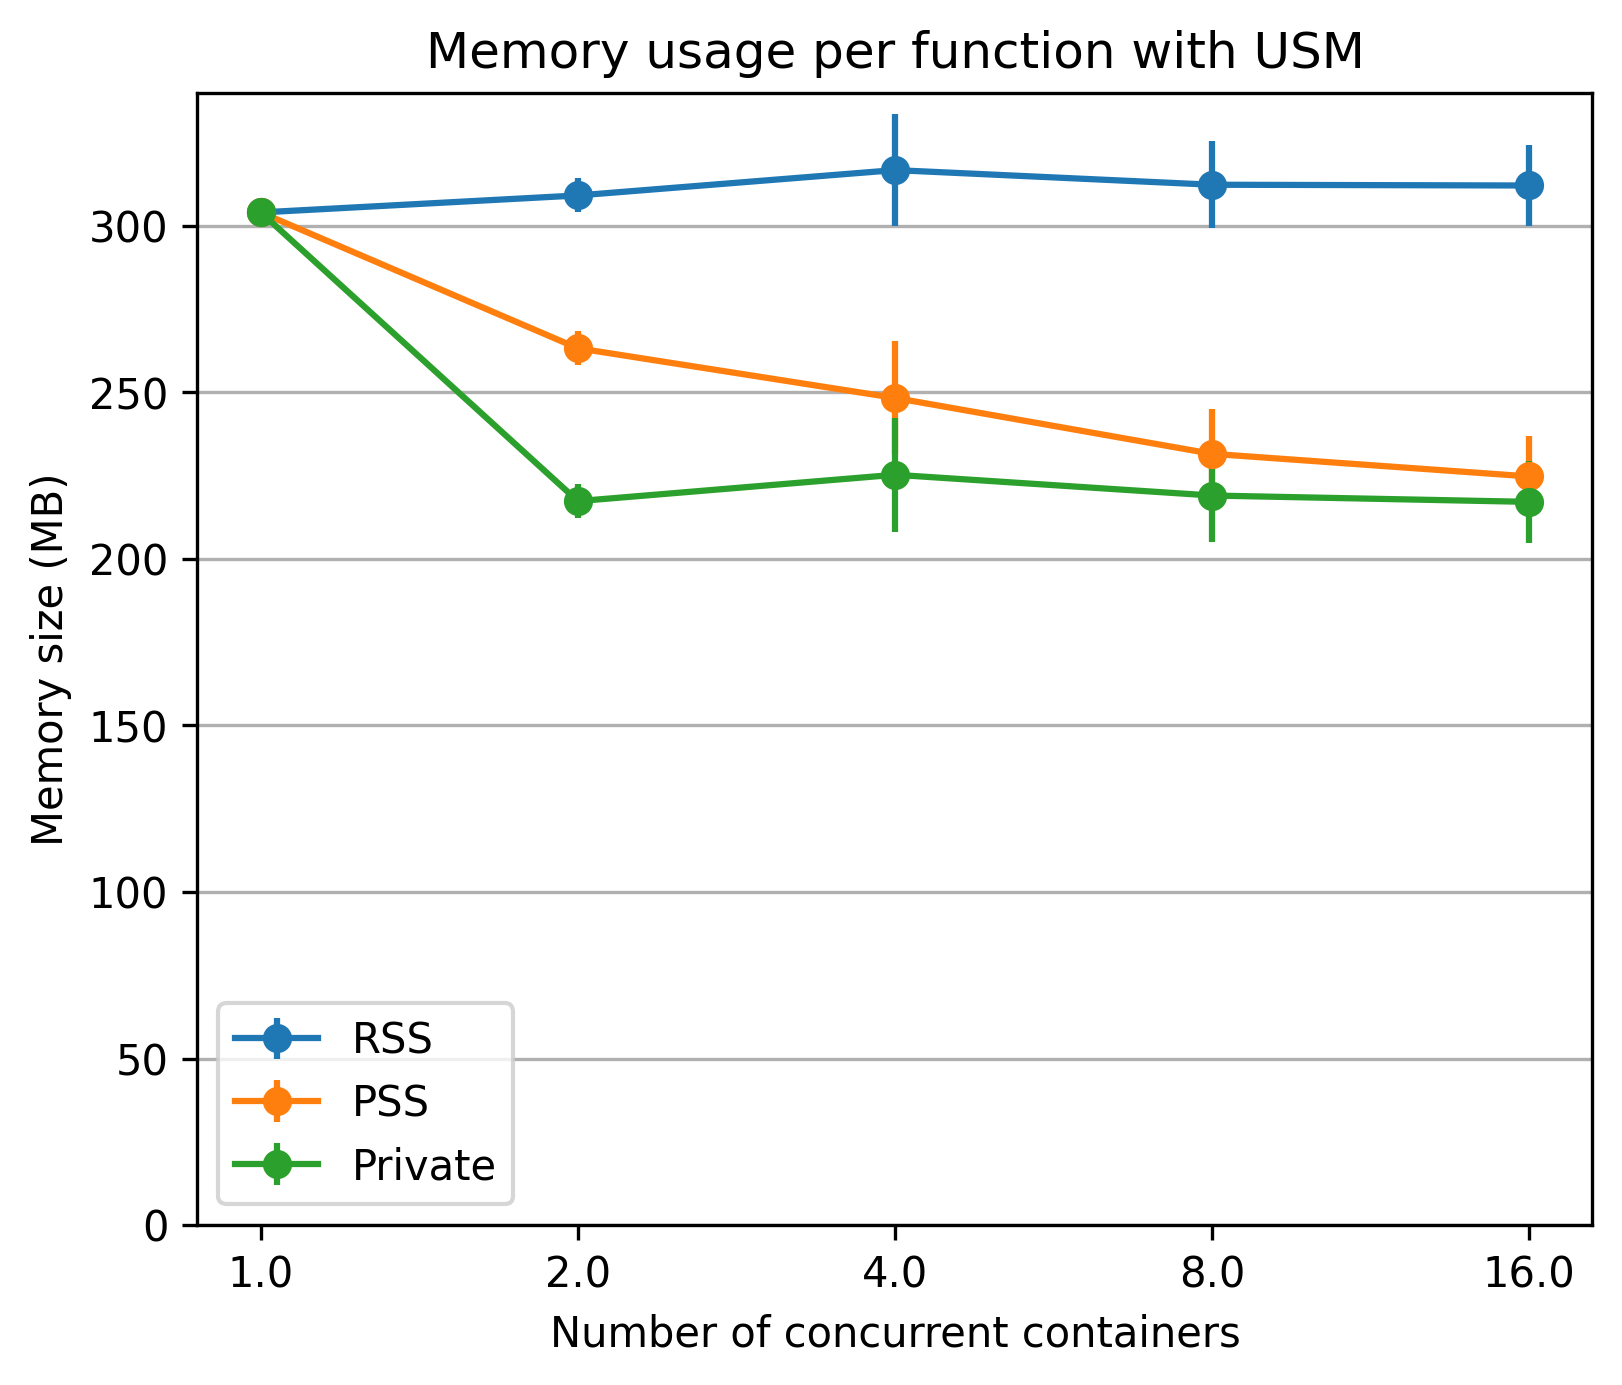

In [8]:
dedup = 1
data_dir = os.path.join(usm_data_dir, machine, "memory_usage", benchmark, "function_memory/dedup_on")
n = math.log(int(num),2)
n = int(n)
x_axis = np.logspace(0,n,n+1,base=2)
data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)

# plt.subplot(1,2,2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,5)
plt.errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
plt.errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
plt.errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
plt.title("Memory usage per function with USM")
plt.xlabel('Number of concurrent containers')
plt.ylabel('Memory size (MB)')
#plt.ylim(ymin=210, ymax=340)
plt.ylim(ymin=0)
plt.xticks(x, x_axis)
# plt.legend(loc="lower left")
plt.legend()
plt.grid(axis='y')
print("dedup:", dedup)

# plt.savefig(os.path.join(data_dir + "/", "two_together_concurrent.jpg"))

off 0    397.367188
1    397.986328
2    397.824219
3    395.806152
4    398.235107
dtype: float64
off 0    397.363281
1    392.937500
2    390.074219
3    386.580811
4    388.324097
dtype: float64
on 0    393.453125
1    393.611328
2    393.676758
3    392.436035
4    393.376465
dtype: float64
on 0    393.449219
1    272.074219
2    211.115723
3    179.257324
4    164.918518
dtype: float64
/work/serverless/2022/memdedup/usm_plot_data_needed2/einstein_vm/plots/memory_recognition-alexnet_new.pdf


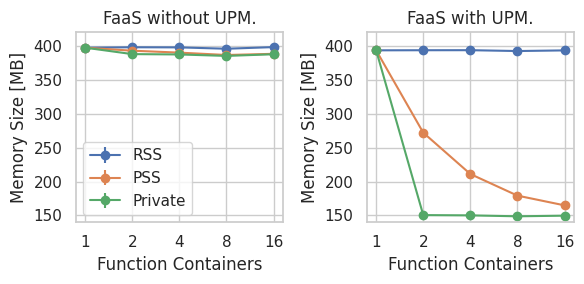

In [4]:
# without usm: pss 300.069214
# 230.724854

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math


import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots(nrows=1, ncols=2)
#plt.subplots_adjust(hspace=40)
             
sns.set_style("whitegrid")  
sns.set(rc={'figure.figsize':(6,3)})                             
sns.set_style("whitegrid")  

usm_data_dir = r"/work/serverless/2022/memdedup/usm_plot_data_needed2"
# machine = r"einstein_vm"
machine = r"einstein_vm"
#benchmark = "411.image-recognition"
benchmark = "recognition-alexnet"
num = 16
dedup = 0

data_dir = os.path.join(usm_data_dir, machine, "memory_usage", benchmark, "function_memory", "dedup_off")


n = math.log(int(num),2)
n = int(n)
# x_axis = np.logspace(0,n,n+1,base=2)
x_axis = [1, 2, 4, 8, 16]

data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

print('off', data_rss_avg)
print('off', data_pss_avg)

x = np.arange(1,n+2)
# print(x)

# plt.subplot(1,2,1)
# plt.rcParams['figure.dpi'] = 500
#plt.rcParams["figure.figsize"] = (6,5)
ax[0].errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
ax[0].errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
ax[0].errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
ax[0].set_title("FaaS without UPM.")
ax[0].set_xlabel('Function Containers')
ax[0].set_ylabel('Memory Size [MB]')
ax[0].set_ylim(ymin=140, ymax=420)
ax[0].set_xticks(x, x_axis)
ax[0].legend(loc="lower left")
#plt.grid(axis='y')


dedup = 1
data_dir = os.path.join(usm_data_dir, machine, "memory_usage", benchmark, "function_memory/dedup_on")
n = math.log(int(num),2)
n = int(n)
x_axis = np.logspace(0,n,n+1,base=2)
data = {}
data_rss_avg = []
data_rss_err = []
data_pss_avg = []
data_pss_err = []
data_private_avg = []
data_private_err = []

for i in x_axis:
    i = int(i)
    data[str(i)] = {}
    file_name = "pmap_result" + str(i) + ".csv"
    data[str(i)]["df"] = pd.read_csv(os.path.join(data_dir + "/", str(i) + "/", file_name))
    data[str(i)]["rss"] = data[str(i)]["df"]["rss"]
    data[str(i)]["pss"] = data[str(i)]["df"]["pss"]
    data[str(i)]["private_clean"] = data[str(i)]["df"]["private_clean"]
    data[str(i)]["private_dirty"] = data[str(i)]["df"]["private_dirty"]
    data[str(i)]["rss_avg"] = np.mean(data[str(i)]["rss"])
    data[str(i)]["rss_err"] = round(np.std(data[str(i)]["rss"]),1)
    data[str(i)]["pss_avg"] = np.mean(data[str(i)]["pss"])
    data[str(i)]["pss_err"] = round(np.std(data[str(i)]["pss"]),1)
    data[str(i)]["private_avg"] = np.mean(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"])
    data[str(i)]["private_err"] = round(np.std(data[str(i)]["private_clean"] + data[str(i)]["private_dirty"]),1)

    data_rss_avg.append(data[str(i)]["rss_avg"])
    data_rss_err.append(data[str(i)]["rss_err"])
    data_pss_avg.append(data[str(i)]["pss_avg"])
    data_pss_err.append(data[str(i)]["pss_err"])
    data_private_avg.append(data[str(i)]["private_avg"])
    data_private_err.append(data[str(i)]["private_err"])
    # print (data[str(i)]["df"])
    # print (data[str(i)]["rss"])
    # print (data[str(i)]["rss_avg"])
    # print (data[str(i)]["rss_err"])
    # print (data[str(i)]["pss_avg"])
    # print (data[str(i)]["pss_err"])

data_rss_avg = pd.Series(data_rss_avg) / 1024
data_rss_err = pd.Series(data_rss_err) / 1024
data_pss_avg = pd.Series(data_pss_avg) / 1024
data_pss_err = pd.Series(data_pss_err) / 1024
data_private_avg = pd.Series(data_private_avg) / 1024
data_private_err = pd.Series(data_private_err) / 1024

#print(data_rss_avg, data_pss_avg)

x = np.arange(1,n+2)

print('on', data_rss_avg)
print('on', data_pss_avg)

# plt.subplot(1,2,2)
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams["figure.figsize"] = (6,5)
ax[1].errorbar(x, data_rss_avg, yerr=data_rss_err,  fmt='o-', label="RSS")
ax[1].errorbar(x, data_pss_avg, yerr=data_pss_err,  fmt='o-', label="PSS")
ax[1].errorbar(x, data_private_avg, yerr=data_private_err,  fmt='o-', label="Private")
# plt.title('Concurrent containers running ' + benchmark)
ax[1].set_title("FaaS with UPM.")
ax[1].set_xlabel('Function Containers')
ax[1].set_ylabel('Memory Size [MB]')
ax[1].set_ylim(ymin=140, ymax=420)
#plt.ylim(ymin=210, ymax=340)
x_axis = [1, 2, 4, 8, 16]
ax[1].set_xticks(x, x_axis)
# plt.legend(loc="lower left")
#ax[1].legend()
#plt.grid(axis='y')
#print("dedup:", dedup)
fig.tight_layout()


plt.savefig(os.path.join(usm_data_dir, machine, "plots", f'memory_{benchmark}_new.pdf'))
print(os.path.join(usm_data_dir, machine, "plots", f'memory_{benchmark}_new.pdf'))
